In [1]:
import pandas as pd
import seaborn as sns
import sklearn as skl
import numpy as np
import matplotlib as mpl

In [2]:
data = pd.read_csv('Hub+ Experian Data For Modelling.csv')
data.head()

,viewer_id,p_0154_prop_superfast_broadband_speed_v1b,p_0172_prop_tv_ondemand_subscription_v1b,p_0175_prop_mobile_brand_apple_v1b,p_0192_prop_monthly_mobile_bill_30_50_v1b,p_0193_prop_monthly_mobile_bill_50_plus_v1b,p_0755_prop_use_smartphone_to_watch_content_yes_v1a,p_0773_prop_use_tablet_to_watch_content_yes_v1a,p_affluence_v2,h_lifestage,h_family_lifestage_2011,h_number_of_children_in_household_v3
0,6f95b059-cd56-4d3a-9c0c-a538b73147ce,0.4976,0.1667,0.3877,0.1801,0.0246,0.6082,0.6127,11,08,04,2.0
1,53bb72d4-457b-4f84-b8be-ef75d0457282,0.3260,0.1344,0.4933,0.1256,0.0428,0.4522,0.5548,19,11,08,0.0
2,0e7953b3-88a2-48d6-8388-4e8d60d05abe,0.3304,0.1199,0.3069,0.1205,0.0121,0.4276,0.5464,6,10,08,2.0
3,256738a0-8b5b-49ae-852f-0cb041d506ef,0.4447,0.1862,0.3449,0.1411,0.0106,0.7382,0.6465,3,09,10,1.0
4,3be64b8e-a3fc-4e10-97b6-336bf2b98522,0.4863,0.0381,0.2277,0.0513,0.0044,0.3741,0.4839,6,09,10,0.0


In [3]:
data.dropna()

,viewer_id,p_0154_prop_superfast_broadband_speed_v1b,p_0172_prop_tv_ondemand_subscription_v1b,p_0175_prop_mobile_brand_apple_v1b,p_0192_prop_monthly_mobile_bill_30_50_v1b,p_0193_prop_monthly_mobile_bill_50_plus_v1b,p_0755_prop_use_smartphone_to_watch_content_yes_v1a,p_0773_prop_use_tablet_to_watch_content_yes_v1a,p_affluence_v2,h_lifestage,h_family_lifestage_2011,h_number_of_children_in_household_v3
0,6f95b059-cd56-4d3a-9c0c-a538b73147ce,0.4976,0.1667,0.3877,0.1801,0.0246,0.6082,0.6127,11,08,04,2.0
1,53bb72d4-457b-4f84-b8be-ef75d0457282,0.3260,0.1344,0.4933,0.1256,0.0428,0.4522,0.5548,19,11,08,0.0
2,0e7953b3-88a2-48d6-8388-4e8d60d05abe,0.3304,0.1199,0.3069,0.1205,0.0121,0.4276,0.5464,6,10,08,2.0
3,256738a0-8b5b-49ae-852f-0cb041d506ef,0.4447,0.1862,0.3449,0.1411,0.0106,0.7382,0.6465,3,09,10,1.0
4,3be64b8e-a3fc-4e10-97b6-336bf2b98522,0.4863,0.0381,0.2277,0.0513,0.0044,0.3741,0.4839,6,09,10,0.0
5,0366a4de-a562-41c2-b6bb-18a73a2e2027,0.3081,0.0438,0.2506,0.0411,0.0043,0.3460,0.4874,14,12,12,0.0
6,87f2c39c-8705-47e7-8388-80f971ea0b6b,0.4460,0.0709,0.3586,0.0741,0.0230,0.4183,0.5653,19,09,09,0.0
7,233360ba-a868-4f3f-8627-6069b178b61d,0.3864,0.2492,0.3932,0.1545,0.0117,0.6417,0.6280,7,09,10,2.0
8,eb3a8c92-8da3-4573-8fc5-93dbdbcce19e,0.4555,0.1259,0.2511,0.1268,0.0139,0.6272,0.6231,1,04,00,0.0
9,baaf5dc0-d228-447b-8932-f60cccf3d5f9,0.4735,0.1228,0.3201,0.1415,0.0136,0.5357,0.5286,2,07,07,1.0


In [4]:
data1 = pd.read_pickle('clean_data_for_modelling.p')

In [5]:
data = data.merge(data1, left_on='viewer_id', right_on='viewer_id', how='inner')
data.head()

,viewer_id,p_0154_prop_superfast_broadband_speed_v1b,p_0172_prop_tv_ondemand_subscription_v1b,p_0175_prop_mobile_brand_apple_v1b,p_0192_prop_monthly_mobile_bill_30_50_v1b,p_0193_prop_monthly_mobile_bill_50_plus_v1b,p_0755_prop_use_smartphone_to_watch_content_yes_v1a,p_0773_prop_use_tablet_to_watch_content_yes_v1a,p_affluence_v2,h_lifestage,...,two_sim,seven_sim,sixteen_twentyfour,sixteen_thirtyfour,affluency,female_flag,hub_tenure,boi_within_seven_days,churn_binary,vod_bad_flag
0,6f95b059-cd56-4d3a-9c0c-a538b73147ce,0.4976,0.1667,0.3877,0.1801,0.0246,0.6082,0.6127,11,08,...,0.0,0.0000,0.0,0.0,0.0,0.0,942.0,1,1,0
1,53bb72d4-457b-4f84-b8be-ef75d0457282,0.3260,0.1344,0.4933,0.1256,0.0428,0.4522,0.5548,19,11,...,0.0,20.8257,0.0,0.0,1.0,1.0,927.0,3,0,0
2,0e7953b3-88a2-48d6-8388-4e8d60d05abe,0.3304,0.1199,0.3069,0.1205,0.0121,0.4276,0.5464,6,10,...,0.0,0.0000,0.0,0.0,0.0,1.0,1241.0,2,0,0
3,256738a0-8b5b-49ae-852f-0cb041d506ef,0.4447,0.1862,0.3449,0.1411,0.0106,0.7382,0.6465,3,09,...,0.0,0.0000,1.0,1.0,0.0,0.0,890.0,1,1,0
4,0366a4de-a562-41c2-b6bb-18a73a2e2027,0.3081,0.0438,0.2506,0.0411,0.0043,0.3460,0.4874,14,12,...,0.9,0.9000,0.0,0.0,0.0,1.0,1191.0,2,1,0


In [6]:
data.dtypes

viewer_id                                               object
p_0154_prop_superfast_broadband_speed_v1b              float64
p_0172_prop_tv_ondemand_subscription_v1b               float64
p_0175_prop_mobile_brand_apple_v1b                     float64
p_0192_prop_monthly_mobile_bill_30_50_v1b              float64
p_0193_prop_monthly_mobile_bill_50_plus_v1b            float64
p_0755_prop_use_smartphone_to_watch_content_yes_v1a    float64
p_0773_prop_use_tablet_to_watch_content_yes_v1a        float64
p_affluence_v2                                           int64
h_lifestage                                             object
h_family_lifestage_2011                                 object
h_number_of_children_in_household_v3                   float64
one_day_mins                                           float64
two_day_mins                                           float64
seven_day_mins                                         float64
one_sim                                                

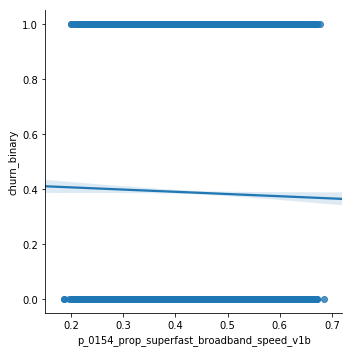

In [7]:
%matplotlib inline
import seaborn as sns 
sns.lmplot(x='p_0154_prop_superfast_broadband_speed_v1b',y='churn_binary',data=data,fit_reg=True) 

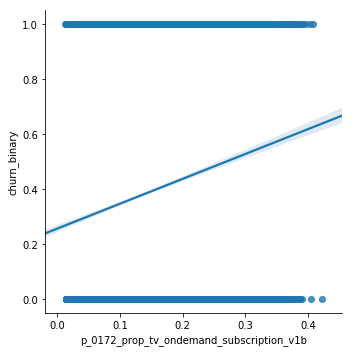

In [8]:
sns.lmplot(x='p_0172_prop_tv_ondemand_subscription_v1b',y='churn_binary',data=data,fit_reg=True)

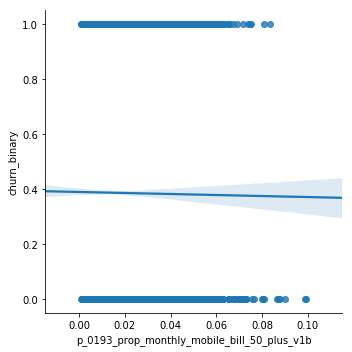

In [9]:
sns.lmplot(x='p_0193_prop_monthly_mobile_bill_50_plus_v1b',y='churn_binary',data=data,fit_reg=True)

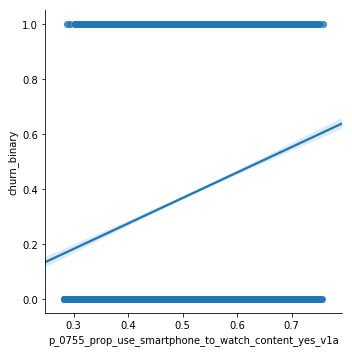

In [10]:
sns.lmplot(x='p_0755_prop_use_smartphone_to_watch_content_yes_v1a',y='churn_binary',data=data,fit_reg=True)

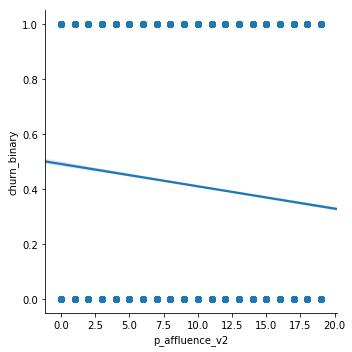

In [11]:
sns.lmplot(x='p_affluence_v2',y='churn_binary',data=data,fit_reg=True)

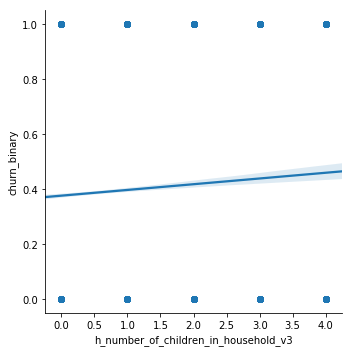

In [12]:
sns.lmplot(x='h_number_of_children_in_household_v3',y='churn_binary',data=data,fit_reg=True)

In [13]:
data = data[data.h_lifestage != 'U']
data = data[data.h_family_lifestage_2011 != 'U']

In [14]:
data.groupby(['h_lifestage']).nunique('viewer_id')

,viewer_id,p_0154_prop_superfast_broadband_speed_v1b,p_0172_prop_tv_ondemand_subscription_v1b,p_0175_prop_mobile_brand_apple_v1b,p_0192_prop_monthly_mobile_bill_30_50_v1b,p_0193_prop_monthly_mobile_bill_50_plus_v1b,p_0755_prop_use_smartphone_to_watch_content_yes_v1a,p_0773_prop_use_tablet_to_watch_content_yes_v1a,p_affluence_v2,h_lifestage,...,two_sim,seven_sim,sixteen_twentyfour,sixteen_thirtyfour,affluency,female_flag,hub_tenure,boi_within_seven_days,churn_binary,vod_bad_flag
h_lifestage,,,,,,,,,,,,,,,,,,,,,
00,198,142,138,141,130,79,134,139,19,1,...,39,60,2,2,2,2,159,7,2,1
01,536,160,157,161,151,97,151,150,20,1,...,116,175,2,2,2,2,349,10,2,1
02,190,95,95,95,90,68,93,91,20,1,...,34,49,2,2,2,2,139,9,2,1
03,1806,797,740,781,575,227,724,685,20,1,...,370,539,2,2,2,2,870,13,2,1
04,3437,355,333,376,326,171,348,314,20,1,...,686,994,2,2,2,2,1153,16,2,1
05,768,335,332,343,291,169,328,297,20,1,...,163,248,2,2,2,2,475,10,2,1
06,4570,1385,1153,1378,801,331,1303,1088,20,1,...,949,1388,2,2,2,2,1223,17,2,1
07,3355,390,364,404,341,211,362,353,20,1,...,749,1072,2,2,2,2,1120,20,2,1
08,1137,511,493,510,429,237,493,468,20,1,...,244,341,2,2,2,2,624,13,2,1


In [15]:
data['h_lifestage'] = data['h_lifestage'].astype(float)
data['p_affluence_v2'] = data['p_affluence_v2'].astype(float)
data['boi_within_seven_days'] = data['boi_within_seven_days'].astype(float)

In [16]:
data.head()

,viewer_id,p_0154_prop_superfast_broadband_speed_v1b,p_0172_prop_tv_ondemand_subscription_v1b,p_0175_prop_mobile_brand_apple_v1b,p_0192_prop_monthly_mobile_bill_30_50_v1b,p_0193_prop_monthly_mobile_bill_50_plus_v1b,p_0755_prop_use_smartphone_to_watch_content_yes_v1a,p_0773_prop_use_tablet_to_watch_content_yes_v1a,p_affluence_v2,h_lifestage,...,two_sim,seven_sim,sixteen_twentyfour,sixteen_thirtyfour,affluency,female_flag,hub_tenure,boi_within_seven_days,churn_binary,vod_bad_flag
0,6f95b059-cd56-4d3a-9c0c-a538b73147ce,0.4976,0.1667,0.3877,0.1801,0.0246,0.6082,0.6127,11.0,8.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,942.0,1.0,1,0
1,53bb72d4-457b-4f84-b8be-ef75d0457282,0.3260,0.1344,0.4933,0.1256,0.0428,0.4522,0.5548,19.0,11.0,...,0.0,20.8257,0.0,0.0,1.0,1.0,927.0,3.0,0,0
2,0e7953b3-88a2-48d6-8388-4e8d60d05abe,0.3304,0.1199,0.3069,0.1205,0.0121,0.4276,0.5464,6.0,10.0,...,0.0,0.0000,0.0,0.0,0.0,1.0,1241.0,2.0,0,0
3,256738a0-8b5b-49ae-852f-0cb041d506ef,0.4447,0.1862,0.3449,0.1411,0.0106,0.7382,0.6465,3.0,9.0,...,0.0,0.0000,1.0,1.0,0.0,0.0,890.0,1.0,1,0
4,0366a4de-a562-41c2-b6bb-18a73a2e2027,0.3081,0.0438,0.2506,0.0411,0.0043,0.3460,0.4874,14.0,12.0,...,0.9,0.9000,0.0,0.0,0.0,1.0,1191.0,2.0,1,0


In [17]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data.iloc[:,1:])
np.nan_to_num(data)

array([['6f95b059-cd56-4d3a-9c0c-a538b73147ce', 0.4976, 0.1667, ..., 1.0,
        1, 0],
       ['53bb72d4-457b-4f84-b8be-ef75d0457282', 0.326, 0.1344, ..., 3.0, 0,
        0],
       ['0e7953b3-88a2-48d6-8388-4e8d60d05abe', 0.3304, 0.1199, ..., 2.0,
        0, 0],
       ..., 
       ['dc577a22-408c-40a4-92f0-ea01ac50a0b5', 0.4885, 0.1654, ..., 2.0,
        0, 0],
       ['1329c2e8-9673-454a-9c4f-ca9913bade12', 0.3356, 0.2375, ..., 2.0,
        1, 0],
       ['159ca22c-a970-40a9-9ab8-81e7e05d50e7', 0.3958, 0.3668, ..., 1.0,
        1, 0]], dtype=object)

In [27]:
data = data.fillna(0)
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = data.values
X = array[:,1:24]
Y = array[:,24]
Y = Y.astype(float)
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.02220477  0.02238192  0.02251569  0.02187967  0.02179148  0.02333576
  0.02312783  0.0833077   0.05232175  0.055372    0.01183236  0.09937707
  0.09910609  0.10559001  0.03572562  0.03832973  0.05343595  0.01150421
  0.01546591  0.01009459  0.00860344  0.10976471  0.05293173]


In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['one_day_mins','two_day_mins',
                             'seven_day_mins','one_sim','two_sim',
                             'seven_sim','sixteen_twentyfour','sixteen_thirtyfour','affluency',
                             'female_flag','hub_tenure','boi_within_seven_days',
                             'p_0154_prop_superfast_broadband_speed_v1b',
                             'p_0172_prop_tv_ondemand_subscription_v1b',
                             'p_0175_prop_mobile_brand_apple_v1b',
                             'p_0192_prop_monthly_mobile_bill_30_50_v1b',
                             'p_0193_prop_monthly_mobile_bill_50_plus_v1b',
                             'p_0755_prop_use_smartphone_to_watch_content_yes_v1a',
                             'p_0773_prop_use_tablet_to_watch_content_yes_v1a',
                             'p_affluence_v2',
                             'h_number_of_children_in_household_v3']],
                             data['churn_binary'], 
                             test_size=0.3, random_state=42)

In [30]:
X_train = X_train.fillna(0)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40038 entries, 48506 to 56496
Data columns (total 21 columns):
one_day_mins                                           40038 non-null float64
two_day_mins                                           40038 non-null float64
seven_day_mins                                         40038 non-null float64
one_sim                                                40038 non-null float64
two_sim                                                40038 non-null float64
seven_sim                                              40038 non-null float64
sixteen_twentyfour                                     40038 non-null float64
sixteen_thirtyfour                                     40038 non-null float64
affluency                                              40038 non-null float64
female_flag                                            40038 non-null float64
hub_tenure                                             40038 non-null float64
boi_within_seven_days        

In [32]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from pyearth import Earth

X = X_train 
Y = y_train

# create feature union
features = []
features.append(('pca', PCA(n_components=23))) #calculate x principal components
features.append(('select_best', SelectKBest(k=23))) #find the best y principal components
feature_union = FeatureUnion(features)

# create pipeline LogisticRegression(), svm.LinearSVC(), svm.SVR(), RandomForestClassifier(), 
## GradientBoostingClassifier(), MLPClassifier()
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('GBC', GradientBoostingClassifier())) 
model = Pipeline(estimators)

# set up gridsearch to find the best parameter values specified in the ranges below
parameters = {'feature_union__pca__n_components':[1, 15], 'feature_union__select_best__k':[1, 15]}
clf = GridSearchCV(model, parameters)
model2 = clf.fit(X, Y)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_feature_union__pca__n_components',
 'param_feature_union__select_best__k',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [33]:
model2

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=23, score_func=<function f_classif at 0x000000001D005E18>))],
       ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'feature_union__pca__n_components': [1, 15], 'feature_union__select_best__k': [1, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
X_test.dtypes

one_day_mins                                           float64
two_day_mins                                           float64
seven_day_mins                                         float64
one_sim                                                float64
two_sim                                                float64
seven_sim                                              float64
sixteen_twentyfour                                     float64
sixteen_thirtyfour                                     float64
affluency                                              float64
female_flag                                            float64
hub_tenure                                             float64
boi_within_seven_days                                  float64
p_0154_prop_superfast_broadband_speed_v1b              float64
p_0172_prop_tv_ondemand_subscription_v1b               float64
p_0175_prop_mobile_brand_apple_v1b                     float64
p_0192_prop_monthly_mobile_bill_30_50_v1b              

In [35]:
X_test = X_test.fillna(0)

In [36]:
## note that accuracy score only works for discrete values, i.e. integers, for continuous
## variables, you will have to use metrics like MSE, metrics.mean_square_error()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, model2.predict(X_test))
print(acc)

0.620571095571


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model2.predict(X_test))

array([[8979, 1378],
       [5133, 1670]], dtype=int64)

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test, model2.predict(X_test))

0.24547993532265178

In [39]:
from sklearn.metrics import precision_score
precision_score(y_test, model2.predict(X_test))

0.54790026246719159

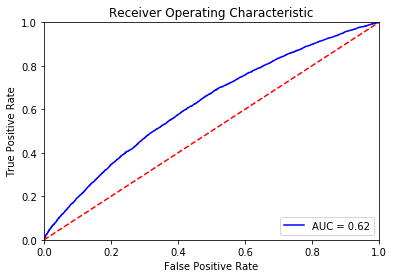

In [40]:
from sklearn import metrics

probs = model2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()